In [1]:
from scipy.io import arff
import pandas as pd
import statistics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score

import plotly.graph_objects as go
import seaborn as sns

from sklearn.impute import KNNImputer

from skfeature.function.similarity_based import fisher_score

from random import randint

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import xgboost as xgb
import catboost
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

from sklearn.model_selection import StratifiedKFold

import pickle

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
data1 = arff.loadarff('1year.arff')
df1 = pd.DataFrame(data1[0])


df1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


# We see the repartion of the class

<AxesSubplot:xlabel='class', ylabel='count'>

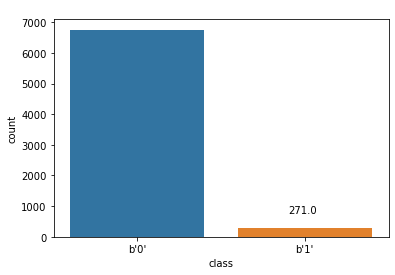

In [3]:

class_bar=sns.countplot(data=df1,x="class")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

<AxesSubplot:xlabel='class', ylabel='count'>

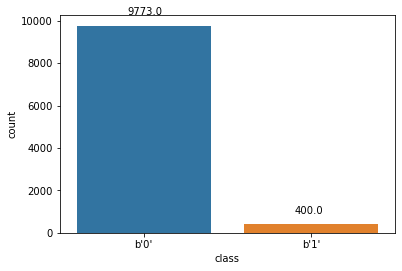

In [4]:
data2 = arff.loadarff('2year.arff')
df2 = pd.DataFrame(data2[0])



class_bar=sns.countplot(data=df2,x="class")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

<AxesSubplot:xlabel='class', ylabel='count'>

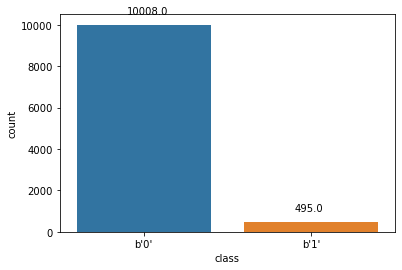

In [5]:
data3 = arff.loadarff('3year.arff')
df3 = pd.DataFrame(data3[0])


class_bar=sns.countplot(data=df3,x="class")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

<AxesSubplot:xlabel='class', ylabel='count'>

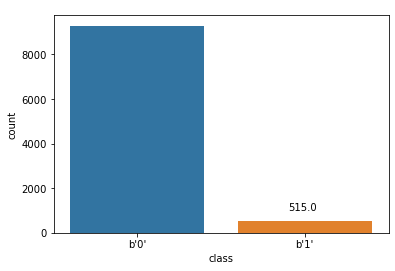

In [6]:
data4 = arff.loadarff('4year.arff')
df4 = pd.DataFrame(data4[0])


class_bar=sns.countplot(data=df4,x="class")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

<AxesSubplot:xlabel='class', ylabel='count'>

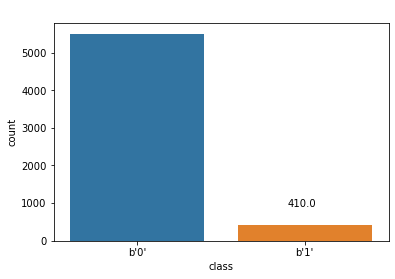

In [7]:
data5 = arff.loadarff('5year.arff')
df5 = pd.DataFrame(data5[0])



class_bar=sns.countplot(data=df5,x="class")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

## We can observe that all the dataset are imbalanced, there's a lot more of b'0 class. So if we train our data with this imbalance dataset and test it later with the new testing data, our model will be a lot partial towards the class 'b0'. So we came with this solution: We'll take all the b1 class from the five dataset et take 500 b1 class  randomly from each dataset

In [8]:
values_class = df1['class'].unique()


df_class = df1[df1['class'] == values_class[1]]
df_class = df_class.append(df2[df2['class'] == values_class[1]])
df_class = df_class.append(df3[df3['class'] == values_class[1]])
df_class = df_class.append(df4[df4['class'] == values_class[1]])
df_class = df_class.append(df5[df5['class'] == values_class[1]])
df_class

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
6756,0.030372,0.874460,0.081671,1.09500,-76.581,0.00000,0.038522,0.143570,1.96770,0.125540,...,0.001575,0.241920,0.97971,0.034768,4.0379,4.6154,159.520,2.2881,33.72300,b'1'
6757,0.032686,0.827750,0.020096,1.05040,-41.614,0.00000,0.041231,0.208090,1.05460,0.172250,...,0.041392,0.189770,0.96152,1.415700,9.4101,3.9256,137.870,2.6474,1.81340,b'1'
6758,0.649890,0.098723,0.483760,5.90020,264.600,0.00000,0.815270,9.128800,1.46040,0.901230,...,0.557580,0.721120,0.44213,0.000000,NaN,5.1698,24.673,14.7930,3.49840,b'1'
6759,0.075803,0.760570,-0.199050,0.51163,-57.769,0.00000,0.089522,0.314760,1.65730,0.239400,...,0.239020,0.316640,0.78417,1.196100,35.6190,10.8850,89.765,4.0662,2.09410,b'1'
6760,-0.179970,0.953480,-0.346650,0.63643,-207.040,-0.43095,-0.179970,0.048788,1.19990,0.046519,...,0.026425,-3.868800,0.96751,0.000000,2.9261,6.1379,290.030,1.2585,3.05190,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.706210,0.038857,1.17220,-18.907,0.00000,0.013981,0.416000,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.967020,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.403340,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.255300,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.260180,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.743940,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.125310,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


## There's 2091 rows of class b1, we're gonna add 4000 rows of class b0 to this dataframe. So we're gonna take 800 rows from each dataset (4000/5)

In [9]:
df = df_class.append(df1[df1['class'] == values_class[0]].sample(n=800))
df = df.append(df2[df2['class'] == values_class[0]].sample(n=800))
df = df.append(df3[df3['class'] == values_class[0]].sample(n=800))
df = df.append(df4[df4['class'] == values_class[0]].sample(n=800))
df = df.append(df5[df5['class'] == values_class[0]].sample(n=800))

df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
6756,0.030372,0.874460,0.081671,1.09500,-76.581,0.000000,0.038522,0.143570,1.96770,0.125540,...,0.001575,0.241920,0.97971,0.034768,4.0379,4.6154,159.520,2.2881,33.7230,b'1'
6757,0.032686,0.827750,0.020096,1.05040,-41.614,0.000000,0.041231,0.208090,1.05460,0.172250,...,0.041392,0.189770,0.96152,1.415700,9.4101,3.9256,137.870,2.6474,1.8134,b'1'
6758,0.649890,0.098723,0.483760,5.90020,264.600,0.000000,0.815270,9.128800,1.46040,0.901230,...,0.557580,0.721120,0.44213,0.000000,NaN,5.1698,24.673,14.7930,3.4984,b'1'
6759,0.075803,0.760570,-0.199050,0.51163,-57.769,0.000000,0.089522,0.314760,1.65730,0.239400,...,0.239020,0.316640,0.78417,1.196100,35.6190,10.8850,89.765,4.0662,2.0941,b'1'
6760,-0.179970,0.953480,-0.346650,0.63643,-207.040,-0.430950,-0.179970,0.048788,1.19990,0.046519,...,0.026425,-3.868800,0.96751,0.000000,2.9261,6.1379,290.030,1.2585,3.0519,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,-0.723620,0.831630,-0.071242,0.91433,-40.713,-1.207800,-0.723620,0.202460,3.08300,0.168370,...,-0.200040,-4.297800,1.23470,0.000000,10.2660,9.9936,98.457,3.7072,12.8670,b'0'
2463,0.006137,0.374640,0.311720,2.07590,47.601,-0.032051,0.006137,1.669200,0.78644,0.625360,...,0.235400,0.009813,0.79778,0.007340,3.3978,2.8767,134.470,2.7143,1.9733,b'0'
2365,-0.106090,1.432400,-0.246870,0.78395,-164.580,-0.336200,-0.068151,-0.301880,1.43980,-0.432430,...,0.032179,0.245340,1.04170,-0.600900,3.9671,2.9152,289.680,1.2600,13.8170,b'0'
1431,0.034111,0.265410,0.266670,2.18990,14.753,0.000000,0.046638,2.767800,1.63690,0.734590,...,0.010495,0.046435,0.97213,0.008563,8.3564,7.3209,49.971,7.3043,3.2146,b'0'


<AxesSubplot:xlabel='class', ylabel='count'>

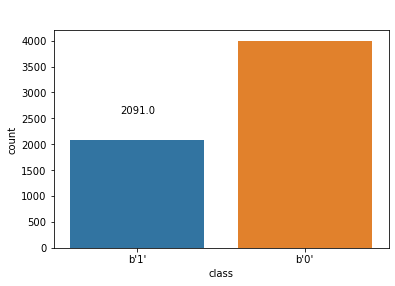

In [10]:
class_bar=sns.countplot(data=df,x="class")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

# the dataset is better balanced

# Check of the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6091 entries, 6756 to 1171
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   6090 non-null   float64
 1   Attr2   6090 non-null   float64
 2   Attr3   6090 non-null   float64
 3   Attr4   6075 non-null   float64
 4   Attr5   6078 non-null   float64
 5   Attr6   6090 non-null   float64
 6   Attr7   6090 non-null   float64
 7   Attr8   6082 non-null   float64
 8   Attr9   6090 non-null   float64
 9   Attr10  6090 non-null   float64
 10  Attr11  6054 non-null   float64
 11  Attr12  6075 non-null   float64
 12  Attr13  6071 non-null   float64
 13  Attr14  6090 non-null   float64
 14  Attr15  6090 non-null   float64
 15  Attr16  6082 non-null   float64
 16  Attr17  6082 non-null   float64
 17  Attr18  6090 non-null   float64
 18  Attr19  6071 non-null   float64
 19  Attr20  6071 non-null   float64
 20  Attr21  4962 non-null   float64
 21  Attr22  6090 non-null   float64
 2

In [12]:
df.shape

(6091, 65)

In [13]:
df.describe()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,6090.000000,6090.000000,6090.000000,6075.000000,6.078000e+03,6090.000000,6090.000000,6082.000000,6090.000000,6090.000000,...,6.091000e+03,6071.000000,6089.000000,6080.000000,6089.000000,5.744000e+03,6075.000000,6.071000e+03,6075.000000,5940.000000
mean,-0.058996,0.920916,-0.190209,3.499780,-3.284086e+01,-0.422955,0.010521,4.537916,2.374360,0.306587,...,6.884213e+03,-2.788154,-0.350578,2.447102,0.633952,4.726968e+02,16.705556,6.654409e+02,8.293241,87.874182
std,6.033312,11.700953,11.667539,20.213262,2.067827e+04,14.196952,6.913040,56.792898,37.089648,16.230085,...,7.109751e+04,146.220133,19.090151,109.538047,20.297168,2.825129e+04,280.569618,1.684837e+04,34.897945,2572.373776
min,-463.890000,-2.421800,-479.960000,-0.403110,-1.076400e+06,-508.410000,-463.890000,-141.410000,-3.496000,-479.910000,...,-9.374800e+05,-8534.600000,-1236.300000,-0.938830,-111.980000,-1.244000e+01,-0.092493,-2.365300e+02,-1.543200,-3.726500
25%,-0.017697,0.306660,-0.027055,0.947145,-6.247550e+01,-0.016322,-0.017900,0.306145,1.009400,0.231625,...,-8.063450e+01,-0.001297,0.000906,0.882375,0.000000,5.249525e+00,4.419550,4.673500e+01,2.738200,2.150175
50%,0.033605,0.531090,0.156595,1.408300,-9.827750e+00,0.000000,0.040719,0.843235,1.189050,0.447295,...,7.126100e+02,0.043212,0.104720,0.958650,0.003515,9.380800e+00,6.642700,8.073300e+01,4.491300,4.279400
75%,0.112837,0.752960,0.370418,2.498150,3.977625e+01,0.038285,0.132453,2.183675,2.052175,0.669538,...,4.127750e+03,0.119090,0.286580,1.000225,0.246040,1.992050e+01,10.811000,1.322350e+02,7.765900,10.059250
max,20.482000,480.960000,1.000000,916.500000,8.713200e+05,322.200000,246.480000,2800.000000,2781.600000,756.150000,...,4.398400e+06,1.926800,147.190000,8536.800000,1463.100000,2.137800e+06,21110.000000,1.073400e+06,1526.800000,143380.000000


# We check for NAN values and duplicates

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isna().sum())

Attr1        1
Attr2        1
Attr3        1
Attr4       16
Attr5       13
Attr6        1
Attr7        1
Attr8        9
Attr9        1
Attr10       1
Attr11      37
Attr12      16
Attr13      20
Attr14       1
Attr15       1
Attr16       9
Attr17       9
Attr18       1
Attr19      20
Attr20      20
Attr21    1129
Attr22       1
Attr23      20
Attr24      89
Attr25       1
Attr26       9
Attr27     894
Attr28     151
Attr29       1
Attr30      20
Attr31      20
Attr32      47
Attr33      16
Attr34       9
Attr35       1
Attr36       1
Attr37    2670
Attr38       1
Attr39      20
Attr40      16
Attr41      73
Attr42      20
Attr43      20
Attr44      20
Attr45     347
Attr46      17
Attr47      31
Attr48       1
Attr49      20
Attr50       9
Attr51       1
Attr52      33
Attr53     151
Attr54     151
Attr55       0
Attr56      20
Attr57       2
Attr58      11
Attr59       2
Attr60     347
Attr61      16
Attr62      20
Attr63      16
Attr64     151
class        0
dtype: int64


## Except for the ATTR 21  ATTR 37 and ATTR 27, the number of NAN are reasonable. So we're gonna replace all the NAN in the others olumns by the mean of the columns. For the 21 ans 37, we're gonna replace NAN by "No". Maybe this data will be useful four the machine learning

In [15]:
for column in df.columns : 
    if(column != 'Attr21' and column != 'Attr37' and column != 'Attr27'):
        a = np.array(df[column])
        mean = np.nanmean(a,dtype='float32')
        df[column] = df[column].replace(np.nan,mean) 

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isna().sum())

Attr1        0
Attr2        0
Attr3        0
Attr4        0
Attr5        0
Attr6        0
Attr7        0
Attr8        0
Attr9        0
Attr10       0
Attr11       0
Attr12       0
Attr13       0
Attr14       0
Attr15       0
Attr16       0
Attr17       0
Attr18       0
Attr19       0
Attr20       0
Attr21    1129
Attr22       0
Attr23       0
Attr24       0
Attr25       0
Attr26       0
Attr27     894
Attr28       0
Attr29       0
Attr30       0
Attr31       0
Attr32       0
Attr33       0
Attr34       0
Attr35       0
Attr36       0
Attr37    2670
Attr38       0
Attr39       0
Attr40       0
Attr41       0
Attr42       0
Attr43       0
Attr44       0
Attr45       0
Attr46       0
Attr47       0
Attr48       0
Attr49       0
Attr50       0
Attr51       0
Attr52       0
Attr53       0
Attr54       0
Attr55       0
Attr56       0
Attr57       0
Attr58       0
Attr59       0
Attr60       0
Attr61       0
Attr62       0
Attr63       0
Attr64       0
class        0
dtype: int64


## We use the KNN imputer to replace the NAN value. Before we're gonna scale the dataset (without the target of course)

In [16]:
'''df['Attr27'].replace(np.nan,'NO',inplace = True)
df['Attr37'].replace(np.nan,'NO',inplace = True)
df['Attr21'].replace(np.nan,'NO',inplace = True)

print(values_class)
df0 = df[(df['class'] == values_class[0]) & (df['Attr27'] != 'NO')]
df1 = df[(df['class'] == values_class[1])& (df['Attr27'] != 'NO')]
print(((df0['Attr27']).mean(),(df1['Attr27']).mean()))
print(((df0['Attr27']).var(),(df1['Attr27']).var()))
print("\n")


df0 = df[(df['class'] == values_class[0]) & (df['Attr37'] != 'NO')]
df1 = df[(df['class'] == values_class[1])& (df['Attr37'] != 'NO')]
print(((df0['Attr37']).mean(),(df1['Attr37']).mean()))
print(((df0['Attr37']).var(),(df1['Attr37']).var()))
print("\n")

      
df0 = df[(df['class'] == values_class[0]) & (df['Attr21'] != 'NO')]
df1 = df[(df['class'] == values_class[1])& (df['Attr21'] != 'NO')]
print(((df0['Attr21']).mean(),(df1['Attr21']).mean()))
print(((df0['Attr21']).var(),(df1['Attr21']).var()))
print("\n")
'''
X = df.drop(['class'],axis = 1)
Y = df['class']
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)
scaled_X = X


X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.1, random_state = 5)
(X_train,X_test)


imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train))
X_test = pd.DataFrame(imputer.fit_transform(X_test))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(X_train).isna().sum())

X_train


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.396180,1.784000,-1.064300,0.39917,-156.6000,-0.499360,-0.396180,-0.439480,2.15680,-0.78405,...,-700.01,-0.155550,0.505300,1.18330,0.000000,472.696716,3.07040,299.7700,1.2176,7.362800
1,0.421330,0.141510,0.435640,7.18300,157.3600,0.878540,0.421330,5.866000,1.59910,0.83010,...,10383.00,0.374660,0.507560,0.62534,0.085597,6.969700,6.90330,22.7140,16.0700,2.292400
2,-0.659970,40.157000,0.867670,7.55700,281.2700,-46.873000,-0.659970,-0.975060,0.44891,-39.15600,...,5.18,-1.470100,0.016855,2.46470,0.000000,472.696716,0.92734,107.5900,3.3924,87.874191
3,0.133310,0.164510,0.400840,3.43660,2.8373,0.000000,0.169280,5.078600,3.65580,0.83549,...,376.74,0.066065,0.159550,0.94701,0.000000,9.810400,21.32800,16.4250,22.2220,8.411100
4,0.120210,0.070411,0.324150,5.60360,41.2930,0.263360,0.148790,12.595000,1.26810,0.88685,...,114830.00,0.211400,0.135550,0.78860,0.000000,6.533600,5.00740,47.1890,7.7348,0.899530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,0.069413,0.157270,0.322670,7.30490,57.6570,0.151890,0.076981,2.952700,1.15000,0.46437,...,26167.00,0.130470,0.149480,0.86953,0.228460,1.921200,5.42130,37.1340,9.8293,0.803400
5477,-0.228100,0.954100,-0.410300,0.40137,-169.5100,-0.075865,-0.228100,0.048108,0.99864,0.04590,...,-33861.00,0.055657,-4.969600,1.04560,4.243400,7.447000,9.01020,250.5100,1.4570,1.377600
5478,0.898720,0.255610,0.918940,14.25400,128.7300,-0.608230,1.042000,2.912300,3.33260,0.74440,...,344.40,0.312590,1.207300,0.69096,0.000000,37.670000,7.94230,7.5935,48.0670,283.990000
5479,0.078319,0.685260,0.138190,1.22370,-17.4150,-0.181290,0.092362,0.459310,2.00090,0.31474,...,2899.50,0.049665,0.248840,0.95465,0.107350,10.543000,4.95470,112.7000,3.2387,8.199700


In [17]:
Y_train=Y_train.astype('int')
Y = Y.astype('int')
Y_test=Y_test.astype('int')
Y_test

8091     0
7005     1
1550     0
5449     0
10169    1
        ..
9281     1
294      0
8725     0
112      0
4205     0
Name: class, Length: 610, dtype: int32

# Now , we check for duplicates and if it exist, we drop it

In [18]:
df.duplicated().sum()

11

In [19]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

# Feature Selection

## At the end , we want the user to use an api to test his data. The API will not be useful with this much features. So we're gonna use 2 features selection methods and keep the features with the most importance

In [20]:
"""
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
"""

"\nfrom sklearn.ensemble import ExtraTreesClassifier\nimport matplotlib.pyplot as plt\nmodel = ExtraTreesClassifier()\nmodel.fit(X_train,Y_train)\nprint(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers\n#plot graph of feature importances for better visualization\nfeat_importances = pd.Series(model.feature_importances_, index=X.columns)\nfeat_importances.nlargest(10).plot(kind='barh')\nplt.show()\n"

In [21]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(pd.DataFrame(X_train), Y_train,10)
(cor_support, cor_feature) 


([False,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [34, 5, 23, 33, 17, 13, 6, 39, 54, 28])

# So we have run the algorithms several times, the attributes that came up often was 

## 27 : profit on operating activities / financial expenses. 
## 56 : (sales - cost of products sold) / sales 
## 1 : net profit / total assets 
## 2 : total liabilities / total assets 
## 35 : profit on sales / total assets 

# We'll keep this attributes to train the model

In [22]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.396180,1.784000,-1.064300,0.39917,-156.6000,-0.499360,-0.396180,-0.439480,2.15680,-0.78405,...,-700.01,-0.155550,0.505300,1.18330,0.000000,472.696716,3.07040,299.7700,1.2176,7.362800
1,0.421330,0.141510,0.435640,7.18300,157.3600,0.878540,0.421330,5.866000,1.59910,0.83010,...,10383.00,0.374660,0.507560,0.62534,0.085597,6.969700,6.90330,22.7140,16.0700,2.292400
2,-0.659970,40.157000,0.867670,7.55700,281.2700,-46.873000,-0.659970,-0.975060,0.44891,-39.15600,...,5.18,-1.470100,0.016855,2.46470,0.000000,472.696716,0.92734,107.5900,3.3924,87.874191
3,0.133310,0.164510,0.400840,3.43660,2.8373,0.000000,0.169280,5.078600,3.65580,0.83549,...,376.74,0.066065,0.159550,0.94701,0.000000,9.810400,21.32800,16.4250,22.2220,8.411100
4,0.120210,0.070411,0.324150,5.60360,41.2930,0.263360,0.148790,12.595000,1.26810,0.88685,...,114830.00,0.211400,0.135550,0.78860,0.000000,6.533600,5.00740,47.1890,7.7348,0.899530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,0.069413,0.157270,0.322670,7.30490,57.6570,0.151890,0.076981,2.952700,1.15000,0.46437,...,26167.00,0.130470,0.149480,0.86953,0.228460,1.921200,5.42130,37.1340,9.8293,0.803400
5477,-0.228100,0.954100,-0.410300,0.40137,-169.5100,-0.075865,-0.228100,0.048108,0.99864,0.04590,...,-33861.00,0.055657,-4.969600,1.04560,4.243400,7.447000,9.01020,250.5100,1.4570,1.377600
5478,0.898720,0.255610,0.918940,14.25400,128.7300,-0.608230,1.042000,2.912300,3.33260,0.74440,...,344.40,0.312590,1.207300,0.69096,0.000000,37.670000,7.94230,7.5935,48.0670,283.990000
5479,0.078319,0.685260,0.138190,1.22370,-17.4150,-0.181290,0.092362,0.459310,2.00090,0.31474,...,2899.50,0.049665,0.248840,0.95465,0.107350,10.543000,4.95470,112.7000,3.2387,8.199700


In [23]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.396180,1.784000,-1.064300,0.39917,-156.6000,-0.499360,-0.396180,-0.439480,2.15680,-0.78405,...,-700.01,-0.155550,0.505300,1.18330,0.000000,472.696716,3.07040,299.7700,1.2176,7.362800
1,0.421330,0.141510,0.435640,7.18300,157.3600,0.878540,0.421330,5.866000,1.59910,0.83010,...,10383.00,0.374660,0.507560,0.62534,0.085597,6.969700,6.90330,22.7140,16.0700,2.292400
2,-0.659970,40.157000,0.867670,7.55700,281.2700,-46.873000,-0.659970,-0.975060,0.44891,-39.15600,...,5.18,-1.470100,0.016855,2.46470,0.000000,472.696716,0.92734,107.5900,3.3924,87.874191
3,0.133310,0.164510,0.400840,3.43660,2.8373,0.000000,0.169280,5.078600,3.65580,0.83549,...,376.74,0.066065,0.159550,0.94701,0.000000,9.810400,21.32800,16.4250,22.2220,8.411100
4,0.120210,0.070411,0.324150,5.60360,41.2930,0.263360,0.148790,12.595000,1.26810,0.88685,...,114830.00,0.211400,0.135550,0.78860,0.000000,6.533600,5.00740,47.1890,7.7348,0.899530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,0.069413,0.157270,0.322670,7.30490,57.6570,0.151890,0.076981,2.952700,1.15000,0.46437,...,26167.00,0.130470,0.149480,0.86953,0.228460,1.921200,5.42130,37.1340,9.8293,0.803400
5477,-0.228100,0.954100,-0.410300,0.40137,-169.5100,-0.075865,-0.228100,0.048108,0.99864,0.04590,...,-33861.00,0.055657,-4.969600,1.04560,4.243400,7.447000,9.01020,250.5100,1.4570,1.377600
5478,0.898720,0.255610,0.918940,14.25400,128.7300,-0.608230,1.042000,2.912300,3.33260,0.74440,...,344.40,0.312590,1.207300,0.69096,0.000000,37.670000,7.94230,7.5935,48.0670,283.990000
5479,0.078319,0.685260,0.138190,1.22370,-17.4150,-0.181290,0.092362,0.459310,2.00090,0.31474,...,2899.50,0.049665,0.248840,0.95465,0.107350,10.543000,4.95470,112.7000,3.2387,8.199700


In [24]:
#columns_to_keep = ['Attr1','Attr2','Attr27','Attr36','Attr56']
columns_to_keep = [0,1,26,35,55]
X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]
print(len(X_train.columns))

X_train.columns = ["net_profit","total_liabilities","profit_operating_activities","profit_on_sales","sales_minus_cost"]
X_test.columns = ["net_profit","total_liabilities","profit_operating_activities","profit_on_sales","sales_minus_cost"]

X_train

5


,net_profit,total_liabilities,profit_operating_activities,profit_on_sales,sales_minus_cost
0,-0.396180,1.784000,-7.02830,2.15680,-0.155550
1,0.421330,0.141510,6.08720,1.16040,0.374660
2,-0.659970,40.157000,-7.85632,0.45059,-1.470100
3,0.133310,0.164510,7.53260,3.66470,0.066065
4,0.120210,0.070411,2.56950,0.58525,0.211400
...,...,...,...,...,...
5476,0.069413,0.157270,1.74090,0.53582,0.130470
5477,-0.228100,0.954100,-2.78500,1.04030,0.055657
5478,0.898720,0.255610,30.93400,3.33260,0.312590
5479,0.078319,0.685260,3.99400,2.00090,0.049665


# Now , we'll do some Data visualization



([<matplotlib.patches.Wedge at 0x26893193490>,
 [Text(0.5096703687197545, 0.9748005515227564, '1'),
  Text(-0.5096704599871669, -0.9748005038039681, '0')])

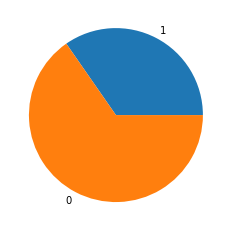

In [25]:
number_class = []

somme = 0
for i in Y_train:
    if(i == 1):
        somme += 1 
        
number_class.append(somme)
number_class.append(Y_train.size - somme)

label = ["1","0"]
plt.pie(number_class,labels = label)

<AxesSubplot:>

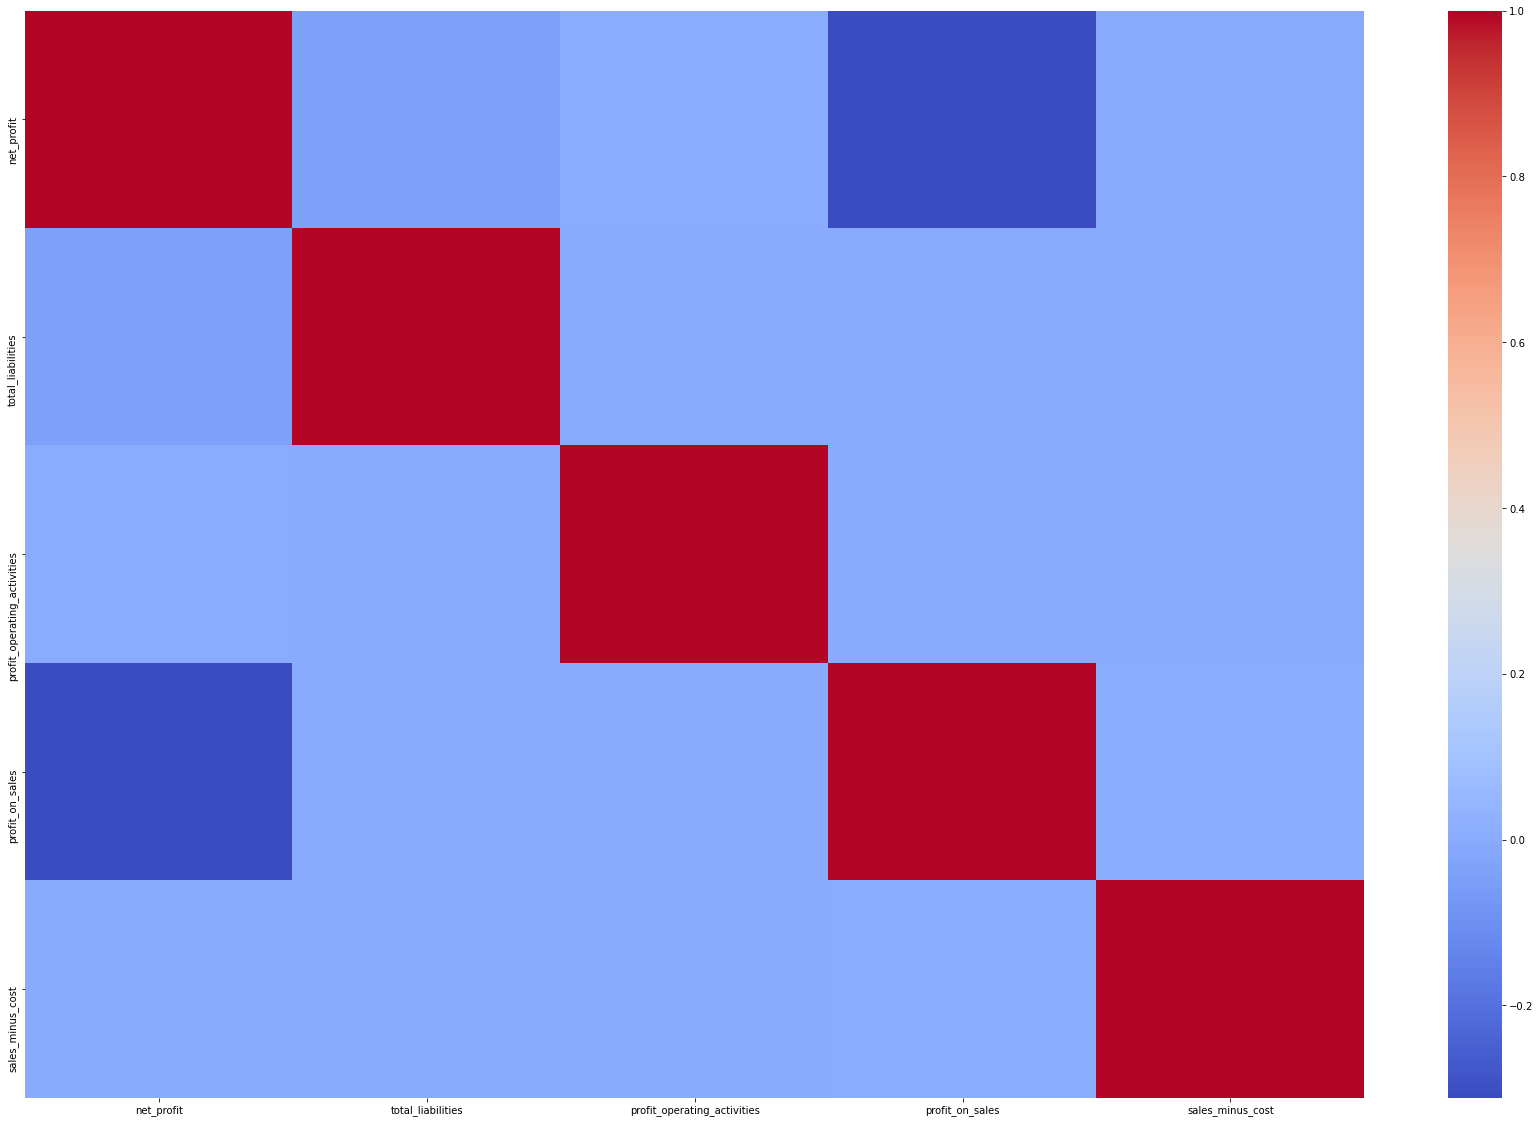

In [26]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(X_train.corr(),ax=ax1,cmap="coolwarm")

## The matrix show some correlations between the target and the features.

In [46]:

df['class'] =  df['class'].astype('int')
print(df['class'])
df_keep_variables_sample  = df[df['class'].astype(int)== 0].sample(n = 350)
df_keep_variables_sample =  df_keep_variables_sample.append(df[df['class'].astype(int)== 1].sample(n = 150))
df_keep_variables_sample

columns_to_keep = ['Attr1','Attr2','Attr27','Attr36','Attr56','class']

df_keep_variables_sample = df_keep_variables_sample[columns_to_keep]

df_keep_variables_sample.columns = ["net_profit","total_liabilities","profit_operating_activities","profit_on_sales","sales_minus_cost",'class']

df_keep_variables_sample

6756    1
6757    1
6758    1
6759    1
6760    1
       ..
4973    0
2463    0
2365    0
1431    0
1171    0
Name: class, Length: 6080, dtype: int32


,net_profit,total_liabilities,profit_operating_activities,profit_on_sales,sales_minus_cost,class
6560,0.077434,0.373100,53.27000,1.19000,0.107120,0
3619,0.007698,0.873540,1.08320,2.78710,0.037675,0
7088,0.282170,0.115770,5642.90000,2.90730,0.091281,0
6790,-0.338770,0.309080,-9.60410,1.69460,-0.182640,0
2590,0.020752,0.345290,0.36084,1.16840,0.047756,0
...,...,...,...,...,...,...
5658,0.020723,0.669980,22.49100,1.29120,0.018353,1
5565,-0.122830,0.719490,-1.40700,2.53690,-0.081260,1
10085,-0.079156,0.398260,-2.75930,1.95610,0.145340,1
10021,0.013889,0.013889,NaN,0.52315,0.035398,1


# We remove the outliers

In [47]:
#Remove the outliers
df_keep_variables_sample_outliers = df_keep_variables_sample
for column in ["net_profit","total_liabilities","profit_operating_activities","profit_on_sales","sales_minus_cost"]:
    upper_limit = df_keep_variables_sample[column].quantile(0.99)
    lower_limit = df_keep_variables_sample[column].quantile(0.01)
    df_keep_variables_sample_outliers.drop(df_keep_variables_sample_outliers[df_keep_variables_sample_outliers[column] < lower_limit*4].index, inplace=True)
    df_keep_variables_sample_outliers.drop(df_keep_variables_sample_outliers[df_keep_variables_sample_outliers[column] > upper_limit*4].index, inplace=True)

# We show the link beetwenn the features and class

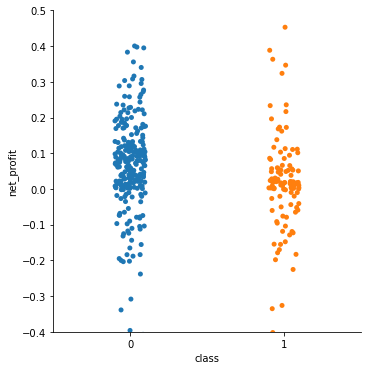

In [48]:
b_plot = sns.catplot(x='class', y = 'net_profit', data = df_keep_variables_sample_outliers)
b_plot.set(ylim=(-0.4, 0.5))

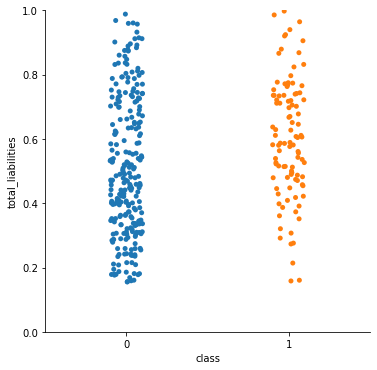

In [49]:
c_plot = sns.catplot(x='class', y = 'total_liabilities', data = df_keep_variables_sample_outliers)
c_plot.set(ylim=(0, 1))

<AxesSubplot:xlabel='class', ylabel='sales_minus_cost'>

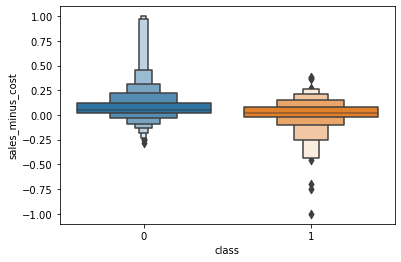

In [50]:
sns.boxenplot(data=df_keep_variables_sample, x="class", y="sales_minus_cost", k_depth="trustworthy")

<AxesSubplot:xlabel='class', ylabel='profit_on_sales'>

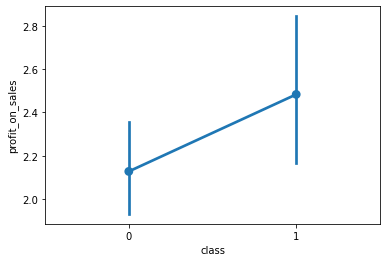

In [51]:
sns.pointplot(data=df_keep_variables_sample, x="class", y="profit_on_sales", dodge=True)

## This one is very interessant , we clearly see the utility of the feature

<AxesSubplot:>

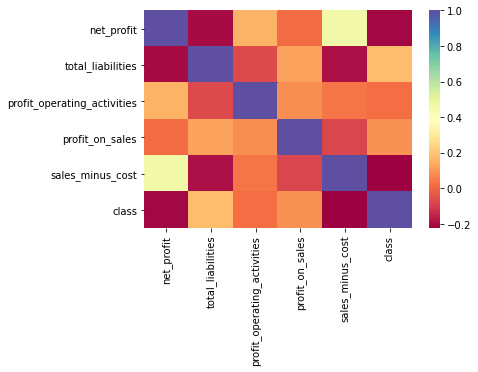

In [52]:
sns.heatmap(df_keep_variables_sample.corr(), cmap = 'Spectral')

# The matrix show that there's a great correlation beetween the class and the features we choose. 

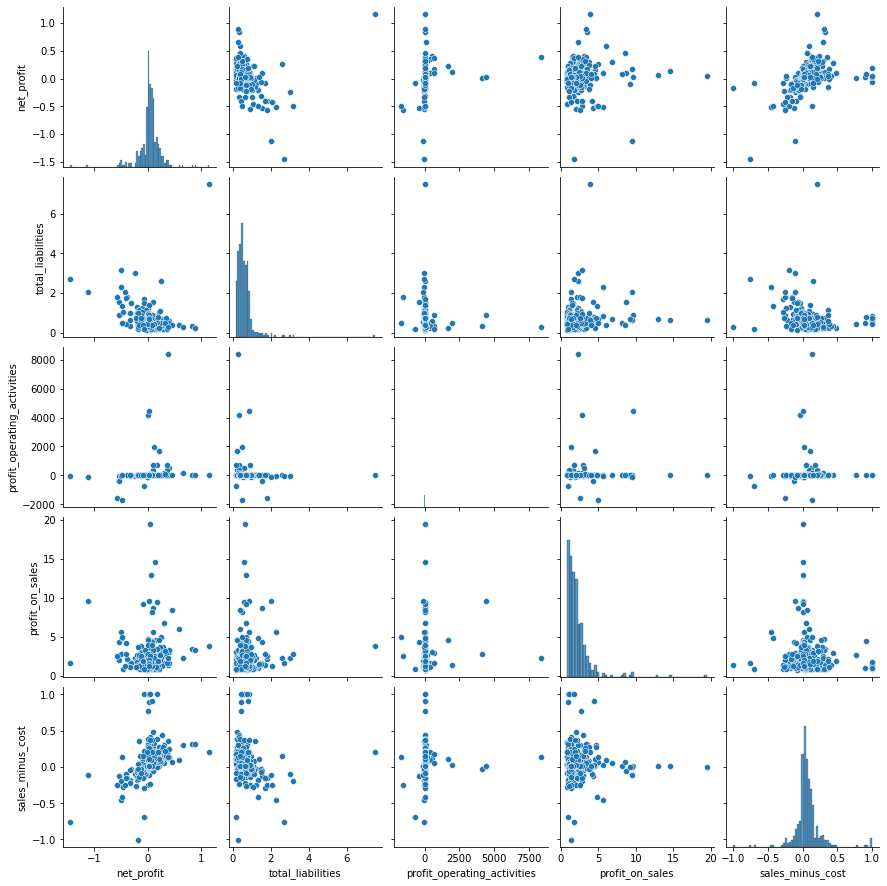

In [53]:
sns.pairplot(df_keep_variables_sample.loc[:, df_keep_variables_sample.columns != 'class'])

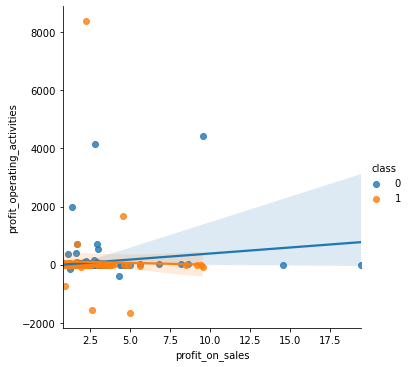

In [54]:
sns.lmplot(data=df_keep_variables_sample, x="profit_on_sales", y="profit_operating_activities", hue="class")

In [ ]:
sns.lmplot(data=df_keep_variables_sample, x="total_liabilities", y="profit_operating_activities", hue="class")

In [ ]:
sns.lmplot(data=df_keep_variables_sample, x="net_profit", y="profit_operating_activities", hue="class")

In [ ]:
sns.lmplot(data=df_keep_variables_sample, x="sales_minus_cost", y="profit_on_sales", hue="class")

In [ ]:
sns.lmplot(data=df_keep_variables_sample, x="total_liabilities", y="net_profit", hue="class")

# Now , we do the ML part. We choose 5 classifiers, the XGB BOOST, CATBOOST, SVR,MLP and GAUSSIAN. We'll do a grid search to find the best parameters for each 

In [ ]:
'''


from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2021)


# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

a = GS.fit(X_train, Y_train)
'''

# XGB BOOST

In [ ]:
'''
# A parameter grid for XGBoost
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)


grid_search.fit(X, Y)

grid_search.best_estimator_

'''

# The code took to much time to execute, so we're gonna set the XG boost classifier with the default parameters.

In [ ]:
## Best estimator:
## XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.6, gamma=5, learning_rate=0.02, max_delta_step=0,
## max_depth=5, min_child_weight=5, missing=None, n_estimators=600,
## n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
## reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1.0)

In [ ]:
### THE CLASSIFIER WITH THIS PARAM DOESN'T WORK AT THE END
XGB = xgb.XGBClassifier()
xgb_classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.02, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=1, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0,verbose  = 0,logging_level = 'Silent')



# CATBOOST

In [ ]:
'''CBC = CatBoostClassifier()

parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
    
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, Y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)
'''

In [ ]:
# The best parameters across ALL searched params: {'depth': 9, 'iterations': 100, 'learning_rate': 0.04}
CBC = CatBoostClassifier(depth = 9, iterations = 100, learning_rate = 0.04,verbose=0, task_type="GPU")

# SVC 

In [ ]:
'''param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=0)
grid.fit(X_train,Y_train)
grid.best_params_
'''

In [ ]:
# The best parameters across ALL searched params: {C = 1000, gamma = 1, kernel = 'rbf'),}
SVC_classifier = SVC(C = 1000, gamma = 1, kernel = 'rbf')

# MLP CLASSIFIER

In [ ]:
'''mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, Y_train) # X is train samples and y is the corresponding labels
print('Best parameters found:\n', clf.best_params_)

'''

In [ ]:
# BEST PARAM =  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
MLP_classifier = MLPClassifier(activation = 'tanh',alpha = 0.001, hidden_layer_sizes = (10,30,10),learning_rate = 'constant',solver = 'sgd')

# GAUSSIAN NB

In [ ]:
'''param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), 
                            param_grid=param_grid_nb, 
                            verbose=1, 
                            cv=10, 
                            n_jobs=-1)
nbModel_grid.fit(X_train, Y_train)
print(nbModel_grid.best_estimator_)
'''

In [ ]:
# BEST PARAM = var_smoothing=1.0
Gaussian_NB = GaussianNB(var_smoothing = 1.0)

In [ ]:


  



clfs = [
    xgb_classifier,
    CBC,
    SVC_classifier,
    MLP_classifier,
    Gaussian_NB,
#     GaussianProcessClassifier()
]
clf_names = [
    "XGBoost",
    "CatBoost",
    "SVC",
    "NeuralNetwork",
    "NaiveBayes",
#     "Gaussian"
]

scores = np.zeros(len(clfs))
list_accuracy = []
for i in np.arange(len(clfs)):
    print(clf_names[i])
    accuracys = (cross_validate(clfs[i], X_train, Y_train.to_numpy(), scoring="roc_auc", cv=5, return_train_score=True,error_score="raise")["test_score"])
    scores[i] = np.mean(accuracys)
    list_accuracy.append(accuracys)



In [ ]:
y = [i for i in range(1,6)]
for i in range(0,len(list_accuracy)):
    plt.plot(y,list_accuracy[i],label = clf_names[i])
    plt.xlabel = ("accuracy")
    plt.ylabel = ("cv")
    plt.legend()
    
plt.show()

In [ ]:
tab_scores = pd.DataFrame(scores, index=clf_names, columns=["Score"])
tab_scores

In [ ]:
c = ['red', 'yellow', 'black', 'blue', 'orange']
ax = tab_scores["Score"].plot(kind='bar',color = c)
plt.show()

## The XGBoost classifier has the best accuracy / time ratio. We'll use it on the API.

In [ ]:
#Cette cellule met trop de temps à charger

'''
N, train_scores, val_scores = learning_curve(CBC, X, Y,cv = 3)

print(N)
plt.plot(N,train_scores.mean(axis = 1),label = 'train')
plt.plot(N,val_scores.mean(axis = 1),label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

N, train_scores, val_scores = learning_curve(SVC_classifier, X, Y,cv = 3)

print(N)
plt.plot(N,train_scores.mean(axis = 1),label = 'train')
plt.plot(N,val_scores.mean(axis = 1),label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

N, train_scores, val_scores = learning_curve(Gaussian_NB, X, Y,cv = 3)

print(N)
plt.plot(N,train_scores.mean(axis = 1),label = 'train')
plt.plot(N,val_scores.mean(axis = 1),label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

plt.show()
'''

# We're gonna predict the test set

In [ ]:
xgb_classifier.fit(X_train,Y_train)
prediction = xgb_classifier.predict(X_test)
prediction

In [ ]:
accuracy_score(Y_test,prediction)

# The accuracy on the prediction is at 80%, we can conclude that the model is efficient

In [ ]:
pickle.dump(xgb_classifier, open("dd.pkl", "wb"))